# Анализ спроса на билеты для авиакомпании

# Описание проекта

- Заказчик проекта — российская авиакомпания «F9», основной деятельностью которой являются пассажирские перевозки внутри страны.
- Задача проекта — изучить предоставленную базу данных и провести анализ спроса пассажиров на билеты в города, где проходят наиболее массовые фестивали.

# Описание данных

Исследование основано на внутренних данных авиакомпании, предоставленных в виде двух csv-файлов.

- /datasets/6_airlines_query_1.csv, где:
    - model — модели самолета
    - flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
- /datasets/6_airlines_query_3.csv, где:
    - city — города
    - average_flights — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

# Содержание

1. [Шаг 1. Загрузка датасета и подготовка его к анализу](#start)
    * [Вывод](#start_total)
2. [Шаг 2. Предобработка данных](#preprocessing)
    * [Вывод](#preprocessing_total)
3. [Шаг 3. Топ-10 городов по количеству рейсов](#top_10)
    * [Вывод](#top_10_total)
4. [Шаг 4. Построение графиков](#graphs)
    * [График: модели самолетов и количество рейсов](#graphs_1)
    * [График: города и количество рейсов](#graphs_3)
    * [График: топ-10 городов и количество рейсов](#graphs_top_10)
    * [Вывод](#graphs_total) 
5. [Итоговый вывод](#total)

## Шаг 1. Загрузка датасетов и подготовка их к анализу<a id="start"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data_1 = pd.read_csv('.../6_airlines_query_1.csv', sep = ',')
data_3 = pd.read_csv('.../6_airlines_query_3.csv', sep = ',')

In [2]:
data_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
data_1.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
data_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
data_3.isnull().sum()

city               0
average_flights    0
dtype: int64

In [7]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


### Вывод<a id="start_total"></a>

Изучили два датафрейма: 
- data_1 (8 строк),
- data_3 (101 строка).

Ни один из датафреймов не имеет пропусков.

## Шаг 2. Предобработка данных<a id="preprocessing"></a>

In [8]:
# <получение суммарного количества дубликатов в таблице >
data_1.duplicated(keep = False).sum()

# <Автоматическая обработка дубликатов не выявила>

0

In [9]:
# <получение суммарного количества дубликатов в таблице >
data_3.duplicated(keep = False).sum()

# <Автоматическая обработка дубликатов не выявила>

0

In [10]:
# <Приводим к нижнему регистру столбец city>

data_3['city'] = data_3['city'].str.lower()
data_3['city'] = data_3['city'].replace(regex= 'ё', value='е')

In [11]:
data_3.head()

,city,average_flights
0,абакан,3.870968
1,анадырь,1.000000
2,анапа,2.161290
3,архангельск,5.354839
4,астрахань,2.451613


In [12]:
# <получение суммарного количества дубликатов в таблице >
data_3.duplicated(keep = False).sum()

# <Автоматическая обработка дубликатов не выявила>

0

### Вывод<a id="preprocessing_total"></a>

Проверили типы данных на корректность с помощью метода .info()

Не изменили тип данных average_flights (float64) на int, чтобы не округлить данные, необходимые для анализа

Привели названия городов к нижнему регистру и заменили все буквы ё на е.
Провели автоматическую обработку дубликатов, которая не выявила дубликатов в таблице.

## Шаг 3. Топ-10 городов по количеству рейсов <a id="top_10"></a>

In [13]:
data_top_10 = data_3.sort_values(by='average_flights', ascending = False).head(10)
data_top_10

,city,average_flights
43,москва,129.774194
70,санкт-петербург,31.161290
54,новосибирск,17.322581
33,красноярск,11.580645
20,екатеринбург,11.322581
67,ростов-на-дону,10.193548
63,пермь,10.129032
10,брянск,10.000000
74,сочи,9.612903
84,ульяновск,9.580645


### Вывод<a id="top_10_total"></a>

С помощью метода sort_values создали новый датафрейм, в котором отсортированы 10 городов с наибольшим количеством полетов. 

Лидирует Москва (129.774), у которой в 4 раза больше полетов в день, чем у следующего по количеству полетов Санкт-Петербурга (31.161)

## Шаг 4. Построение графиков<a id="graphs"></a>

### График: модели самолетов и количество рейсов<a id="graphs_1"></a>


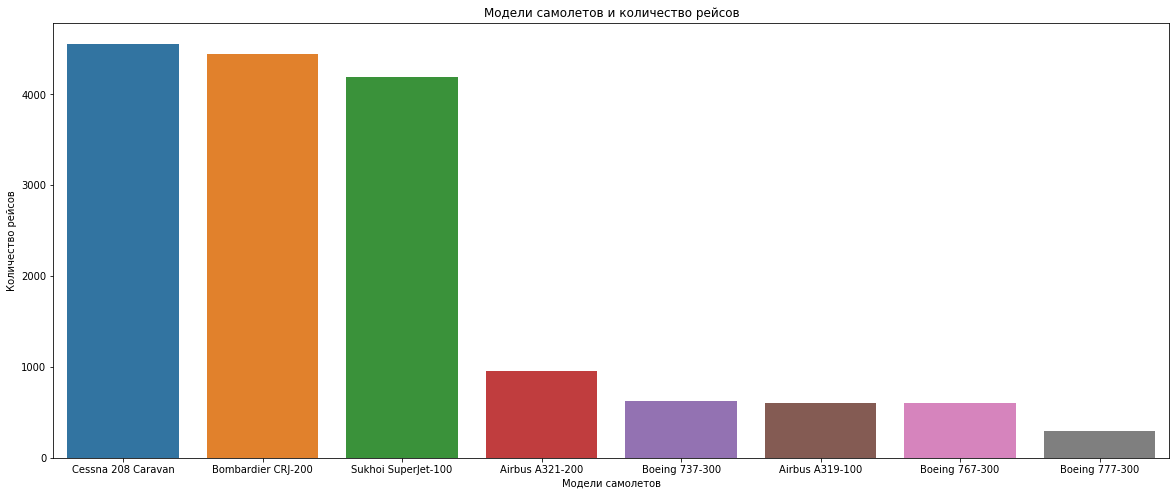

In [14]:
plt.figure(figsize=(20, 8))
data_1_sort = data_1.sort_values(by='flights_amount',ascending=False)
sns.barplot(x='model', y='flights_amount', data = data_1_sort)
plt.title('Модели самолетов и количество рейсов')
plt.ylabel('Количество рейсов')
plt.xlabel('Модели самолетов')
plt.show()

Наиболее популярны 3 модели самолетов:
- Cessna 208 Caravan
- Bombardier CRJ-200
- Sukhoi SuperJet-100

Наименее популярна модель самолета Boeing 777-300

Наиболее популярны 3 модели самолетов:
- Cessna 208 Caravan (легкий многоцелевой самолет, рассчитанный на 9-13 пассажиров, скорее всего используется для местных перевозок в труднодоступные районы, туристических экскурсий и частной аренды)
- Bombardier CRJ-200 (50-местная модель для региональных перелетов, используется в сложных метеорологических условиях и в условиях высокогорных аэродромов)
- Sukhoi SuperJet-100 (российский ближнемагистральный пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность 3050 или 4600 км.)
    
Популярность этих моделей скорее всего связана с их размерами (которые, среди прочего, влияют на стоимость самолета) и сниженной пассажировместимостью в сравнении с остальными моделями, которые имеют пассажировместимость на уровне 100-150 пассажиров. 

Наименее популярна модель самолета Boeing 777-300, фюзеляж которой удлинён на 10 метров, что позволяет разместить до 550 пассажиров.

### График: города и количество рейсов<a id="graphs_3"></a>

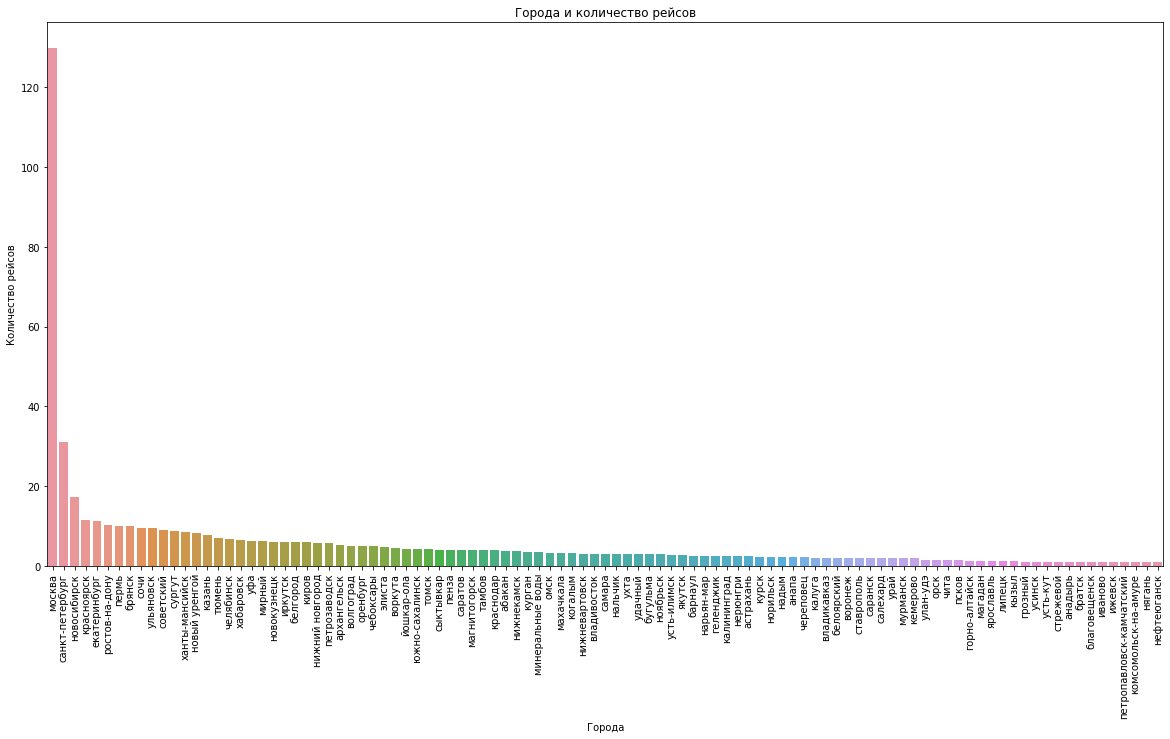

In [15]:
plt.figure(figsize=(20, 10))
data_3_sort = data_3.sort_values(by='average_flights',ascending=False)
sns.barplot(x='city', y='average_flights', data = data_3_sort)
plt.title('Города и количество рейсов')
plt.ylabel('Количество рейсов')
plt.xlabel('Города')
plt.xticks(rotation=90)
plt.show()

In [16]:
data_3_sort = data_3_sort.query('average_flights <= 1')
data_3_sort

,city,average_flights
86,усинск,1.0
88,усть-кут,1.0
76,стрежевой,1.0
1,анадырь,1.0
9,братск,1.0
8,благовещенск,1.0
21,иваново,1.0
22,ижевск,1.0
65,петропавловск-камчатский,1.0
31,комсомольск-на-амуре,1.0


Наибольшее среднее количество рейсов в день имеют следующие города:
- Москва (129.77)
- Санкт-петербург (31.16)
- Новосибирск (17.32)

Всего один рейс в день имеют следующие города:
- Усинск
- Усть-Кут
- Стрежевой
- Анадырь
- Братск
- Благовещенск
- Иваново
- Ижевск
- Петропавловск-Камчатский
- Комсомольск-на-Амуре
- Нагань
- Нефтеюганск

### График: топ-10 городов и количество рейсов<a id="graphs_top_10"></a>

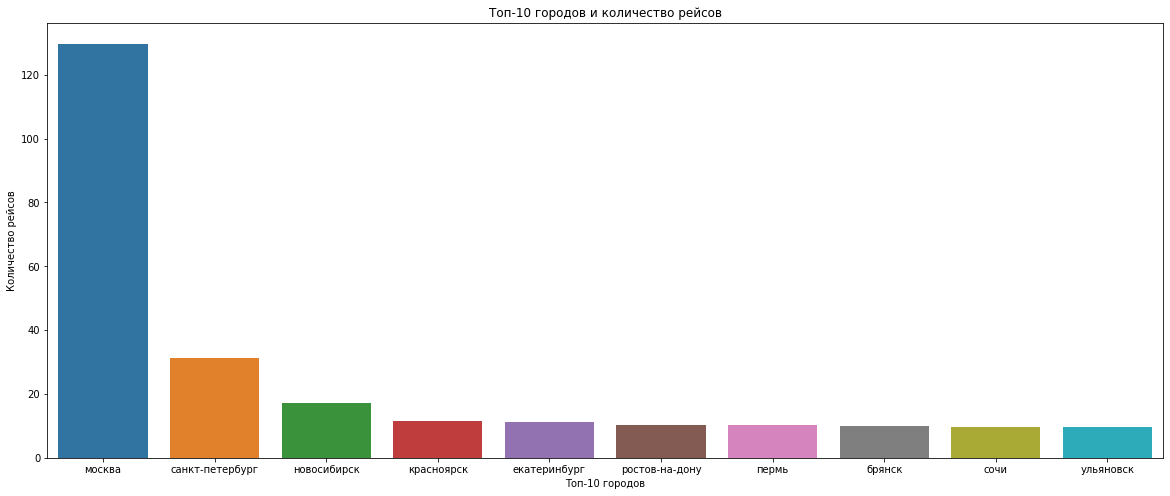

In [17]:
plt.figure(figsize=(20, 8))
sns.barplot(x='city', y='average_flights', data = data_top_10)
plt.title('Топ-10 городов и количество рейсов')
plt.ylabel('Количество рейсов')
plt.xlabel('Топ-10 городов')
plt.show()

In [18]:
data_top_10 = data_top_10.query('average_flights <= 15')
data_top_10

,city,average_flights
33,красноярск,11.580645
20,екатеринбург,11.322581
67,ростов-на-дону,10.193548
63,пермь,10.129032
10,брянск,10.000000
74,сочи,9.612903
84,ульяновск,9.580645


### Вывод<a id="graphs_total"></a>

Москва - абсолютный лидер ко количеству полетов в день (130), это связано с тем, что у Москвы больше всего аэропортов и город является пересадочным пунктом для многих направлений полетов.

Санкт-Петербург - второй город федерального значения, поэтому в нем также достаточно много полетов (31).

Новосибирск - третий по количеству полетов в день (17) город, вероятно он также является пересадочным пунктом для многих направлений полетов.

Остальные города из топ-10 имеют +- 10-11 полетов в день.

## Итоговый вывод<a id="total"></a>

По среднему количеству полетов в день лидируют Москва(130), Санкт-Петербург(31) и Новосибирск(17).

Остальные города из топ-10 по количеству рейсов имеют в среднем по 10-11 полетов в день.

У 12 городов всего один рейс в день.

Наиболее популярны 3 модели самолетов (Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100), это связано с тем, что они имеют наименьшую поссажировместимость (до 100 человек).

Наименее популярна модель самолета Boeing 777-300, имеющая пассажировместимость до 550 человек.